# Using NSE Protons

A common approximation done in networks is to split the protons into 2 groups, with one group restricted to participating in the iron-group photo-ionization rates / NSE.  This is done,
for example, in the common `aprox19` and `aprox21` networks (see [Weaver et al. 1978](https://ui.adsabs.harvard.edu/abs/1978ApJ...225.1021W/abstract)).

This decouples the proton links for the low-$A$ and high-$A$ nuclei, making the linear algebra
and network integration easier.  

pynucastro supports this approximation at the network level through the `make_nse_protons()` method.

## Test Network

Here we construct a simple example of an H-He network with some iron group.

```{caution}
This example is not intended to be used as a production network -- it is missing weak rates, and $(\alpha,p)(p,\gamma)$ links -- it is simply meant to show how to split the protons into 2 groups.
```

In [1]:
import pynucastro as pyna

In [2]:
nuclei = ["p", "n", "d", "he3", "he4",
          "c12", "c13", "n13", "n14", "n15",
          "o14", "o15", "o16",
          "ne20", "na23", "mg24", "al27", "p31",
          "si28", "s32", "ar36", "ca40", "ti44",
          "cr48", "mn51",
          "fe52", "fe53", "fe54", "fe55", "fe56",
          "co55", "co56", "co57", "ni56", "ni57", "ni58"]

In [3]:
rl = pyna.ReacLibLibrary()

In [4]:
lib = rl.linking_nuclei(nuclei)

In [5]:
rc = pyna.RateCollection(libraries=lib)

/home/zingale/development/pynucastro/pynucastro/networks/rate_collection.py:576: UserWarning: ReacLib neutron decay rate (<n_to_p_weak_wc12>) does not account for degeneracy at high densities. Consider using tabular rate from Langanke.
  warnings.warn(msg)


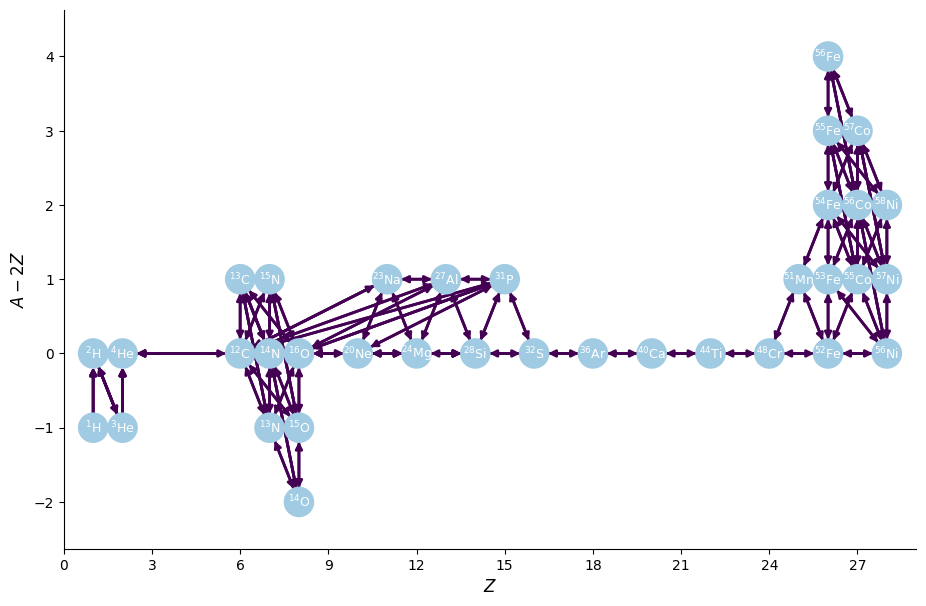

In [6]:
fig = rc.plot(rotated=True, hide_xp=True, hide_xalpha=True,
              node_size=400, node_font_size="9", size=(1100, 700))

In [7]:
len(rc.unique_nuclei)

36

In [8]:
comp = pyna.Composition(rc.unique_nuclei)
comp.set_equal()
rho = 1.e6
T = 2.e9

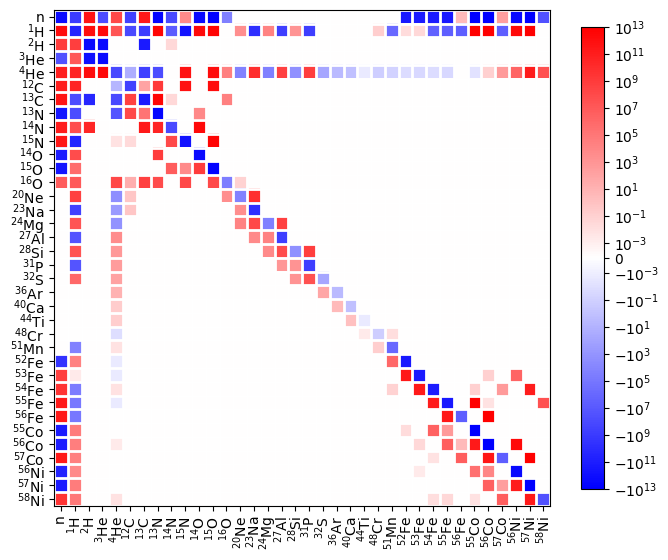

In [9]:
fig = rc.plot_jacobian(rho, T, comp, rate_scaling=1.e16)

From the Jacobian, we can see that the protons are split into two groups, those participating in reactions with $A \le 32$ and those participating in reactions with $A \ge 51$.

## NSE Protons

We can split these by adding an "NSE proton".  This evaluates the same as a regular proton, but tests as distinct, allowing the network to have 2 separate protons.

In [10]:
p = pyna.Nucleus("p")
p_nse = pyna.Nucleus("p_NSE")

In [11]:
p, p_nse

(p, p_nse)

In [12]:
p == p_nse

False

In [13]:
p.Z == p_nse.Z

True

In [14]:
p.A == p_nse.A

True

## Splitting the Protons in Our Network

We'll make all the reactions involving nuclei with $A \ge 48$ use the NSE protons.

In [15]:
A = 48
rc.make_nse_protons(A)

modifying p_Mn51__Fe52 to use NSE protons
modifying Fe52__p_Mn51 to use NSE protons
modifying p_Fe54__Co55 to use NSE protons
modifying Co55__p_Fe54 to use NSE protons
modifying p_Fe55__Co56 to use NSE protons
modifying Co56__p_Fe55 to use NSE protons
modifying p_Fe56__Co57 to use NSE protons
modifying Co57__p_Fe56 to use NSE protons
modifying p_Co55__Ni56 to use NSE protons
modifying Ni56__p_Co55 to use NSE protons
modifying p_Co56__Ni57 to use NSE protons
modifying Ni57__p_Co56 to use NSE protons
modifying p_Co57__Ni58 to use NSE protons
modifying Ni58__p_Co57 to use NSE protons
modifying He4_Cr48__p_Mn51 to use NSE protons
modifying p_Mn51__He4_Cr48 to use NSE protons
modifying He4_Mn51__p_Fe54 to use NSE protons
modifying p_Fe54__He4_Mn51 to use NSE protons
modifying He4_Fe52__p_Co55 to use NSE protons
modifying p_Co55__He4_Fe52 to use NSE protons
modifying He4_Fe53__p_Co56 to use NSE protons
modifying p_Co56__He4_Fe53 to use NSE protons
modifying n_Co55__p_Fe55 to use NSE protons


/home/zingale/development/pynucastro/pynucastro/networks/rate_collection.py:576: UserWarning: ReacLib neutron decay rate (<n_to_p_weak_wc12>) does not account for degeneracy at high densities. Consider using tabular rate from Langanke.
  warnings.warn(msg)


```{note}
We need to rebuild the composition, since we now have one additional nucleus
in the network (`p_nse`).
```

In [16]:
comp_new = pyna.Composition(rc.unique_nuclei)
comp_new.set_equal()

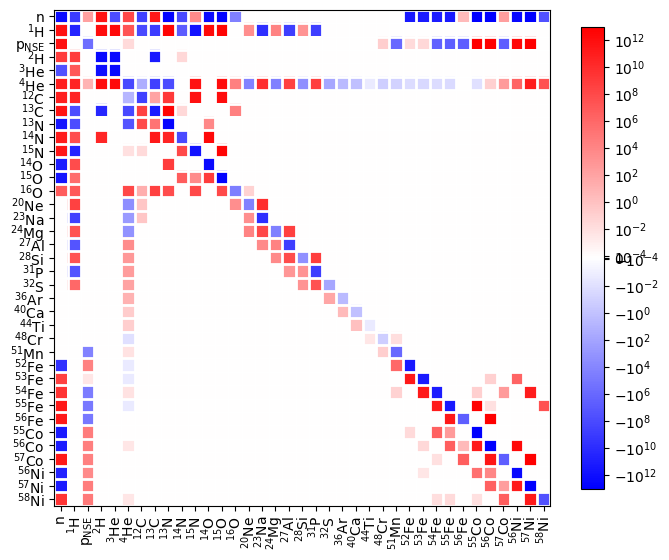

In [17]:
fig = rc.plot_jacobian(rho, T, comp_new, rate_scaling=1.e16)

The Jacobian now shows that the reactions involving heavy nuclei are using `p_nse` protons, decoupling them from the lower mass nuclei.